In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import package with hypothesis tests
import scipy.stats as st
from statsmodels.stats.weightstats import ztest as z_test
from scipy.stats import norm

In [2]:
#load dataset
user_df = pd.read_csv('Data/testSamples.csv')

#check data
user_df.head()

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [3]:
#check shape of user dataframe
user_df.shape

(59721, 2)

In [4]:
#check for duplicate samples (rows)
user_df[user_df.duplicated(subset=['sample_id'],keep=False)]

,sample_id,test_group


#### There are no duplicate users in the dataset

In [5]:
#check dataframe info for missing values
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59721 entries, 0 to 59720
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sample_id   59721 non-null  int64
 1   test_group  59721 non-null  int64
dtypes: int64(2)
memory usage: 933.3 KB


## What is the approximate probability distribution between the test group and the control group?

In [6]:
#check frequency of control group and test group
user_df['test_group'].value_counts()

0    44886
1    14835
Name: test_group, dtype: int64

In [7]:
#compute percentage of each test group
percent_control = (user_df['test_group'].value_counts()[0]/user_df.shape[0]) * 100
percent_test = (user_df['test_group'].value_counts()[1]/user_df.shape[0]) * 100

print(f"{round(percent_control,2)}% of users belong to control group")
print(f"{round(percent_test, 2)}% of users belong to test group")

75.16% of users belong to control group
24.84% of users belong to test group


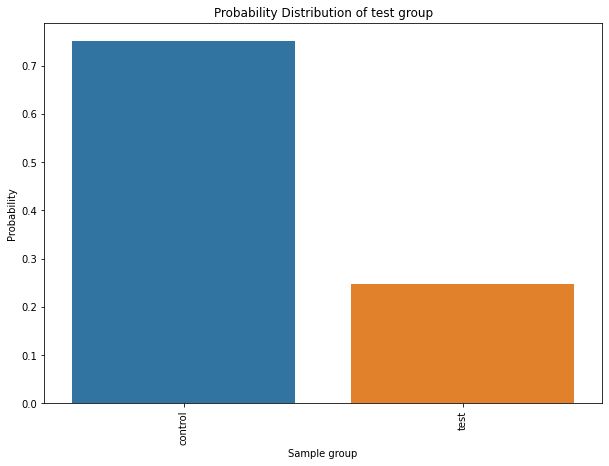

In [8]:
#Plot distribution of data in test group

column_value_counts = user_df.groupby('test_group')['sample_id'].count()

plt.figure(figsize=(10,7))
plt.title("Probability Distribution of test group")
sns.barplot(x= column_value_counts.index, y=(column_value_counts.values/user_df.shape[0]))
label = ['control', 'test']
plt.xticks(column_value_counts.index, label, rotation='vertical')
plt.xlabel("Sample group")
plt.ylabel('Probability')
plt.show()

In [9]:
#load transaction dataset
transaction_df = pd.read_csv('Data/transData.csv')

#check data
transaction_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95


In [10]:
transaction_df.shape

(7430, 4)

In [11]:
#check for duplicate transactions
transaction_df[transaction_df.duplicated(subset=['transaction_id'],keep=False)]

,transaction_id,sample_id,transaction_type,transaction_amount


#### There are no duplicate transactions

In [12]:
#merge datasets
data = pd.merge(transaction_df, user_df, how = 'left', on='sample_id')

#check
data.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1


In [13]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7430 entries, 0 to 7429
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      7430 non-null   int64  
 1   sample_id           7430 non-null   int64  
 2   transaction_type    7430 non-null   object 
 3   transaction_amount  7430 non-null   float64
 4   test_group          7430 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 348.3+ KB


In [14]:
#check unique transaction types
data['transaction_type'].unique()

array(['REBILL', 'CHARGEBACK', 'REFUND'], dtype=object)

## Is a user that must call-in to cancel more likely to generate more revenues?

#### Null hypothesis: A user that must call-in to cancel is less or equally likely to generate more revenue
#### Alternative Hypothesis: A user that must call-in to cancel is more likely to generate more revenue

In [15]:
#check frequency of control group and test group within transaction data
data.groupby('test_group')['sample_id'].nunique()

test_group
0    1079
1    1635
Name: sample_id, dtype: int64

In [16]:
#get dataframe for all transactions belonging to control group
control_df = data[data['test_group'] == 0]

#get dataframe for all transactions belonging to test group
test_df = data[data['test_group'] == 1]

       transaction_id     sample_id  transaction_amount  test_group
count    4.050000e+03   4050.000000         4050.000000      4050.0
mean     5.234995e+07  29518.245679           22.182444         0.0
std      2.144297e+03  17070.262738           14.355346         0.0
min      5.234633e+07    103.000000          -32.950000         0.0
25%      5.234809e+07  14927.750000           19.950000         0.0
50%      5.234996e+07  30028.000000           24.950000         0.0
75%      5.235175e+07  43932.250000           32.950000         0.0
max      5.235375e+07  59689.000000           32.950000         0.0


<AxesSubplot:>

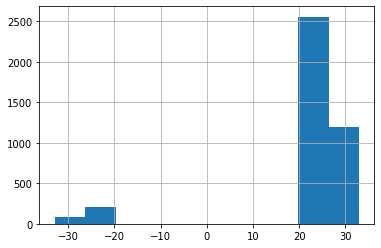

In [17]:
#check the distribution of the data for each group
print(control_df.describe())
control_df['transaction_amount'].hist()

       transaction_id     sample_id  transaction_amount  test_group
count    3.380000e+03   3380.000000         3380.000000      3380.0
mean     5.235015e+07  31117.736391           28.234763         1.0
std      2.141004e+03  17019.699891           15.202526         0.0
min      5.234633e+07     11.000000          -39.950000         1.0
25%      5.234828e+07  16537.000000           24.950000         1.0
50%      5.235020e+07  31686.000000           29.950000         1.0
75%      5.235203e+07  45913.750000           39.950000         1.0
max      5.235376e+07  59694.000000           39.950000         1.0


<AxesSubplot:>

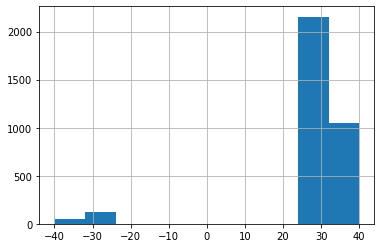

In [18]:
print(test_df.describe())
test_df['transaction_amount'].hist()

In [19]:
#Since both samples (test groups) are unequal, use welch's test
def welch_test(data1, data2):
    '''This function takes 2 sample data, conducts welch test, returns the p-value 
    and decision to accept or reject null hypothesis'''
    
    ##Check variance of both test groups
    if (np.var(data1) != np.var(data2)) and (len(data1) != len(data2)):
        ttest, pval = (st.ttest_ind(data1, data2, equal_var = False))
        print(f"p_value = {pval}")
        
    #decision for one-tailed 
        if pval/2 < 0.05 and ttest>0:
            print("Reject null hypothesis.")
        else:
            print("accept null hypothesis.")
            
    else:
        print("Welch's test cannot be used to compare these two samples")

In [20]:
##Null hypothesis: revenue from test_group <= revenue from control_group
#call function to test hypothesis

welch_test(test_df['transaction_amount'], control_df['transaction_amount'])

p_value = 2.431541247013289e-67
Reject null hypothesis.


#### From the hypothesis test result, there is a 95% confidence level that users that must call-in to cancel will likely generate more revenue

## Is a user that must call-in is more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

#### Null hypothesis: a user that must call-in is less or equally likely to produce a higher chargeback rate
#### Alternative hypothesis: a user that must call-in is more likely to produce a higher chargeback rate

In [21]:
#get dataframe for all chargeback transactions belonging to control group
control_chargeback_df = data[(data['test_group'] == 0) & (data['transaction_type']!= 'REBILL')]

#check
control_chargeback_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
85,52346411,957,REFUND,-24.95,0
86,52346412,957,REFUND,-24.95,0
120,52346446,1178,REFUND,-32.95,0
121,52346447,1178,REFUND,-32.95,0
170,52346496,2035,CHARGEBACK,-32.95,0


In [22]:
control_chargeback_df.shape

(294, 5)

In [23]:
#get dataframe for all chargeback transactions belonging to test group
test_chargeback_df = data[(data['test_group'] == 1) & (data['transaction_type']!= 'REBILL')]

#check
test_chargeback_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
32,52346358,296,CHARGEBACK,-29.95,1
137,52346463,1480,CHARGEBACK,-29.95,1
302,52346628,2880,REFUND,-39.95,1
303,52346629,2880,REFUND,-39.95,1
304,52346630,2880,REFUND,-39.95,1


In [24]:
#compute chargeback rate for control group = number of chargeback transactions/total transactions

control_chargeback_rate = (control_chargeback_df.shape[0]/control_df.shape[0])
print(f'Chargeback rate for control group = {round(control_chargeback_rate,3)}')

#compute chargeback rate for test group
test_chargeback_rate = (test_chargeback_df.shape[0]/test_df.shape[0])
print(f'Chargeback rate for test group = {round(test_chargeback_rate,3)}')

Chargeback rate for control group = 0.073
Chargeback rate for test group = 0.052


In [25]:
#Compute standard deviation
std_control = np.sqrt(control_chargeback_rate * (1-control_chargeback_rate)/control_df.shape[0])
std_test = np.sqrt(test_chargeback_rate * (1 - test_chargeback_rate)/test_df.shape[0])

#compute z-score
z_score = (test_chargeback_rate - control_chargeback_rate)/ np.sqrt(std_control**2 + std_test**2)
print(f"z-score is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

z-score is -3.730, with p-value 1.000


In [26]:
#using Mann-Whitney U test
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(control_chargeback_rate, test_chargeback_rate, alternative="less")
print(f"Mann-Whitney U test for null hypothesis chargeback rate for test <= chargeback rate for control group is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis chargeback rate for test <= chargeback rate for control group is 1.000


#### Since p-value > 0.05 (95% significance level), we accept the null hypothesis
#### Thus, a user that must call-in is more less or equally likely to produce a higher chargeback rate

## Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

#### Null Hypothesis: User that must call-in to cancel is less or equally likely to generate at least 1 addition rebill
#### Alternative Hypothesis: User that must call-in to cancel is more likely to generate at least 1 addition rebill

In [27]:
#get dataframe of all rebill transactions for control group
control_rebill_df = data[(data['test_group'] == 0) & (data['transaction_type']== 'REBILL')]

#check
control_rebill_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,52346332,103,REBILL,19.95,0
7,52346333,103,REBILL,19.95,0
8,52346334,103,REBILL,19.95,0
9,52346335,103,REBILL,19.95,0
10,52346336,103,REBILL,19.95,0


In [28]:
#get dataframe of all rebill transactions for test group
test_rebill_df = data[(data['test_group'] == 1) & (data['transaction_type']== 'REBILL')]

#check
test_rebill_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1


In [29]:
#compute number of rebill transactions generated from control group
num_control_rebill = control_rebill_df['transaction_type'].shape[0]

#compute number of rebill transactions generated from test group
num_test_rebill = test_rebill_df['transaction_type'].shape[0]

In [30]:
#check number of rebill transactions generated by the test group
num_test_rebill

3205

In [31]:
#check number of rebill transactions generated by the control group
num_control_rebill

3756

In [32]:
#using Mann-Whitney U test

stat1, p_value1 = mannwhitneyu(num_control_rebill, num_test_rebill, alternative="less")
print(f"Mann-Whitney U test for null hypothesis: less or equally likely to generate 1 addition rebill is {p_value1:0.3f}")

Mann-Whitney U test for null hypothesis: less or equally likely to generate 1 addition rebill is 1.000
